                          Machine learning with python

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df1=pd.read_csv("/content/50_Startups.csv")
print(df1)

    R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida  141585.52
13   91992.39       

In [ ]:
list(df1.columns)

['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit']

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
df1.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
df1.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
df.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [ ]:
df1.size

250

In [ ]:
df1.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

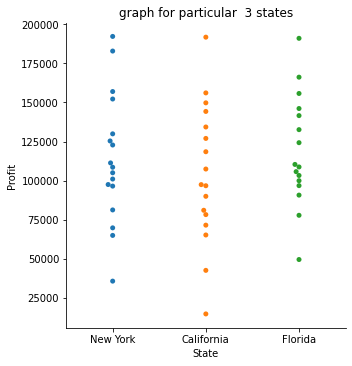

In [ ]:
sns.catplot(x="State",y="Profit",data=df1,kind="swarm",cmap="Blues")
plt.title("graph for particular  3 states")
plt.show()

In [ ]:
a=df1.corr()
a

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


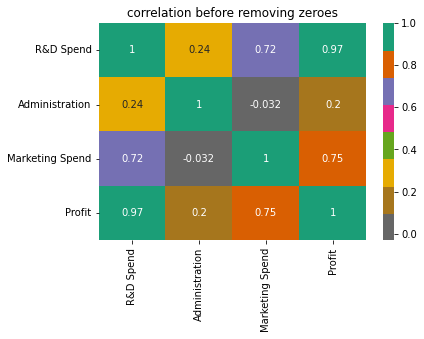

In [ ]:
sns.heatmap(a,annot=True,cmap="Dark2_r")
plt.title("correlation before removing zeroes")
plt.show()

In [ ]:
b1=df1.select_dtypes("number")

In [ ]:
market=b1["Marketing Spend"].mean()
b1["Marketing Spend"].replace(to_replace=0,value=market,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
rd=b1["R&D Spend"].mean()
b1["R&D Spend"].replace(to_replace=0,value=rd,inplace=True)
b1

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,R&D Spend,Administration,Marketing Spend,Profit
0,165349.2000,136897.80,471784.1000,192261.83
1,162597.7000,151377.59,443898.5300,191792.06
2,153441.5100,101145.55,407934.5400,191050.39
3,144372.4100,118671.85,383199.6200,182901.99
4,142107.3400,91391.77,366168.4200,166187.94
5,131876.9000,99814.71,362861.3600,156991.12
6,134615.4600,147198.87,127716.8200,156122.51
7,130298.1300,145530.06,323876.6800,155752.60
8,120542.5200,148718.95,311613.2900,152211.77
9,123334.8800,108679.17,304981.6200,149759.96


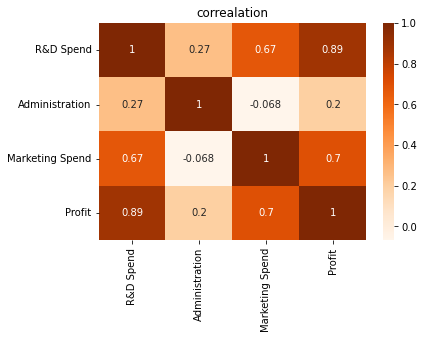

In [ ]:
c=b1.corr()
sns.heatmap(c,annot=True,cmap="Oranges")
plt.title("correalation")
plt.show()

In [ ]:
x=b1.iloc[:,:-1]
y=b1.iloc[:,-1:]

In [ ]:
model=LinearRegression()

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [ ]:
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(x_test)
print("------predicted values are-------")
y_pred

------predicted values are-------


array([[101182.14790183],
       [124433.67151005],
       [125636.83126707],
       [ 69054.1334631 ],
       [173651.29123421],
       [119474.87855812],
       [ 63730.50623484],
       [ 91797.50955171],
       [115658.32170182],
       [161468.82969894],
       [ 93499.01417852],
       [ 84434.51890513],
       [104011.62538384]])

In [ ]:
print("original test of y")
y_test

original test of y


,Profit
28,103282.38
11,144259.40
10,146121.95
41,77798.83
2,191050.39
27,105008.31
38,81229.06
31,97483.56
22,110352.25
4,166187.94


In [ ]:
cm=pd.DataFrame({"original":y_test["Profit"].values,"prediction":y_pred.reshape(-1)})
cm

,original,prediction
0,103282.38,101182.147902
1,144259.40,124433.671510
2,146121.95,125636.831267
3,77798.83,69054.133463
4,191050.39,173651.291234
5,105008.31,119474.878558
6,81229.06,63730.506235
7,97483.56,91797.509552
8,110352.25,115658.321702
9,166187.94,161468.829699


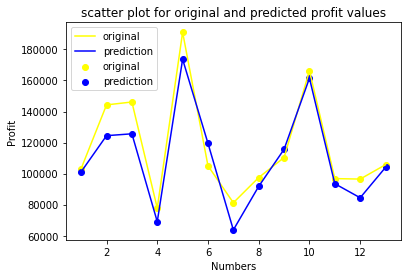

In [ ]:
x_axis=[i for i in range(1,len(y_pred)+1)]
plt.scatter(x_axis,y_test,c="yellow",label="original")
plt.scatter(x_axis,y_pred,c="blue",label="prediction")
plt.plot(x_axis,y_test,c="yellow",label="original")
plt.plot(x_axis,y_pred,c="blue",label="prediction")
plt.title("scatter plot for original and predicted profit values")
plt.xlabel("Numbers")
plt.ylabel("Profit")
plt.legend()
plt.show()

In [ ]:
print(f"Training score is{model.score(x_train,y_train)}")
print(f"Training score is{model.score(x_test,y_test)}")

Training score is0.7866057530211543
Training score is0.8607167185229634


In [ ]:
from sklearn.metrics import r2_score

In [ ]:
print(f"Accuracy for testing predicted and original profit values:{r2_score(y_pred,y_test)}")

Accuracy for testing predicted and original profit values:0.843269492171889


In [ ]:
pred=model.predict(b1.iloc[:,:-1])
y=b1.iloc[:,-1:]

In [ ]:
cm1=pd.DataFrame({"original":y["Profit"].values,"prediction":pred.reshape(-1)})
cm1

,original,prediction
0,192261.83,191251.461357
1,191792.06,188716.358106
2,191050.39,173651.291234
3,182901.99,167681.170107
4,166187.94,161468.829699
5,156991.12,155573.170188
6,156122.51,142067.841557
7,155752.60,156515.229176
8,152211.77,149508.952546
9,149759.96,145969.921457


In [ ]:
print(f"Accuracy for state vise profits:{r2_score(pred,y)}")

Accuracy for state vise profits:0.7511347736954728


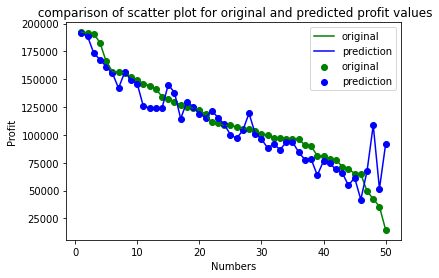

In [ ]:
x_axis=[i for i in range(1,len(pred)+1)]
plt.scatter(x_axis,y,c="green",label="original")
plt.scatter(x_axis,pred,c="blue",label="prediction")
plt.plot(x_axis,y,c="green",label="original")
plt.plot(x_axis,pred,c="blue",label="prediction")
plt.title(" comparison of scatter plot for original and predicted profit values")
plt.xlabel("Numbers")
plt.ylabel("Profit")
plt.legend()
plt.show()